In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


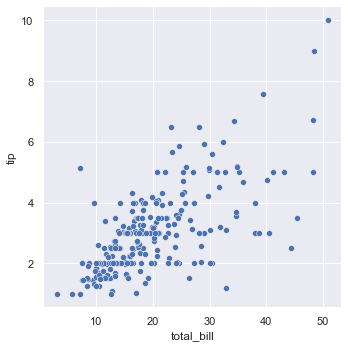

In [3]:
sns.relplot(x="total_bill", y="tip", data=tips);

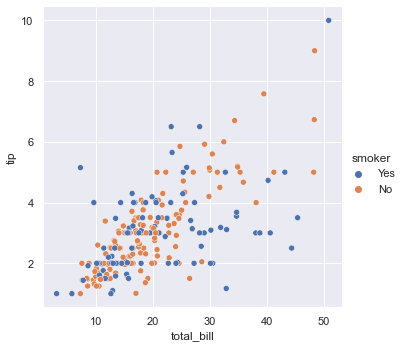

In [4]:
sns.relplot(x="total_bill", y="tip", data=tips, hue='smoker');

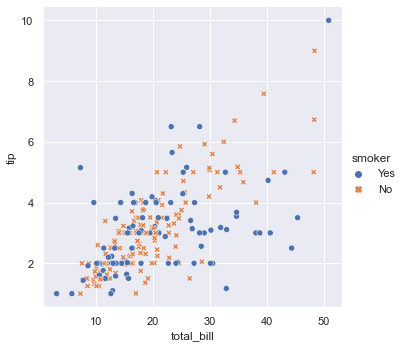

In [5]:
sns.relplot(x="total_bill", y="tip", data=tips, hue='smoker', style='smoker');

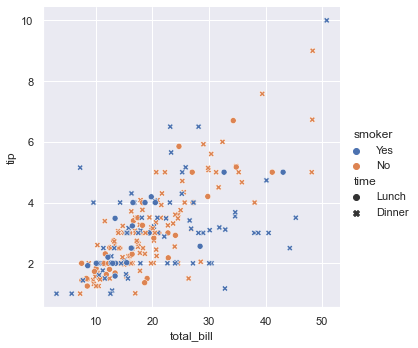

In [6]:
sns.relplot(x="total_bill", y="tip", data=tips, hue='smoker', style='time');

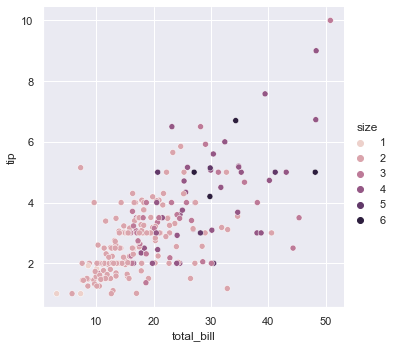

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips, hue='size');

In [41]:
palette="ch:r=-.5,l=.75"

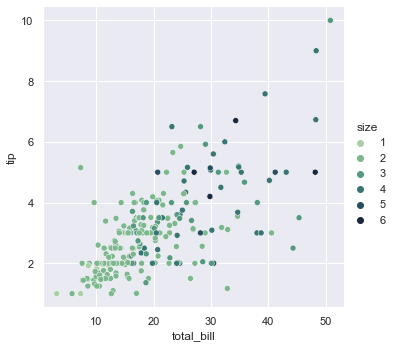

In [9]:
sns.relplot(x="total_bill", y='tip', data=tips, hue='size', palette="ch:r=-.5,l=.75");

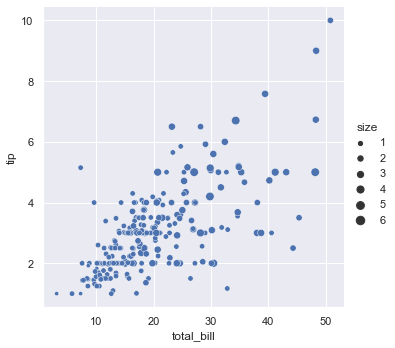

In [10]:
sns.relplot(x='total_bill', y='tip', data=tips, size="size");

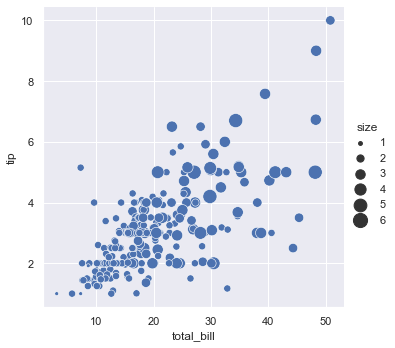

In [11]:
sns.relplot(x='total_bill', y='tip', data=tips, size='size', sizes=(15, 200));

In [12]:
# sns.scatterplot(x='total_bill', y='tip', data=tips, size='size', sizes=(15, 200));

# line plot

In [13]:
df = pd.DataFrame(dict(
    time=np.arange(500),
    value=np.random.randn(500).cumsum()))
df

,time,value
0,0,1.588570
1,1,1.832249
2,2,1.793129
3,3,3.294384
4,4,3.988297
...,...,...
495,495,-30.090364
496,496,-29.746556
497,497,-29.115879
498,498,-28.575317


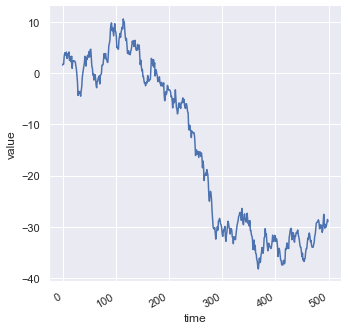

In [14]:
g = sns.relplot(x='time', y='value', data=df, kind='line')
g.figure.autofmt_xdate()

In [42]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=['x', 'y'])
df

,x,y
0,1.114525,-0.194109
1,-1.460049,-0.793007
2,-2.555743,0.614442
3,-2.707256,0.705359
4,-3.557699,2.239659
...,...,...
495,-22.855581,10.084274
496,-23.268232,10.166577
497,-24.038286,9.700291
498,-22.258102,9.083128


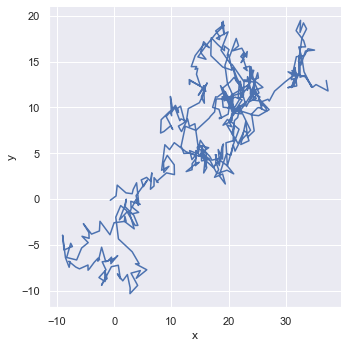

In [16]:
sns.relplot(x='x', y='y', data=df, sort=False, kind='line');

# aggregation and representing uncertainty

In [17]:
fmri = sns.load_dataset('fmri')
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


# confidence interval is 95%

More complex datasets will have multiple measurements for the same value of the x variable.

The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:

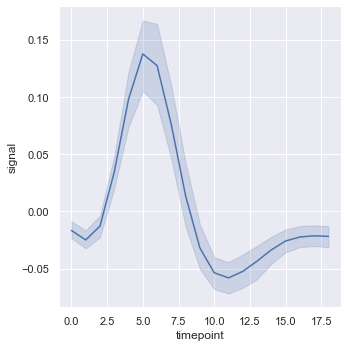

In [19]:
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line');

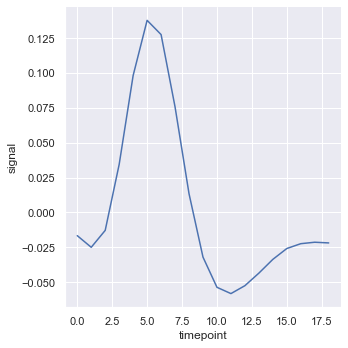

In [20]:
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci=None);

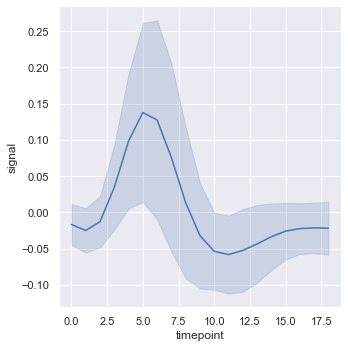

In [21]:
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci='sd');

To turn off aggregation altogether, set the estimator parameter to None This might produce a strange effect when the data have multiple observations at each point.

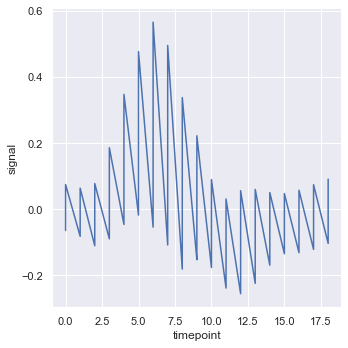

In [22]:
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', estimator=None);

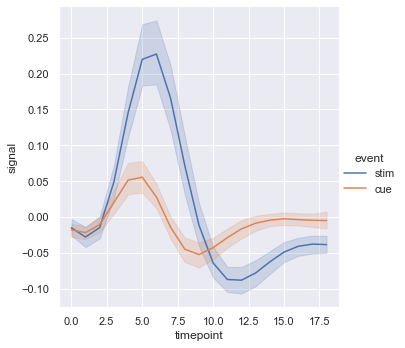

In [23]:
sns.relplot(x='timepoint', y='signal', data=fmri, hue='event', kind='line');

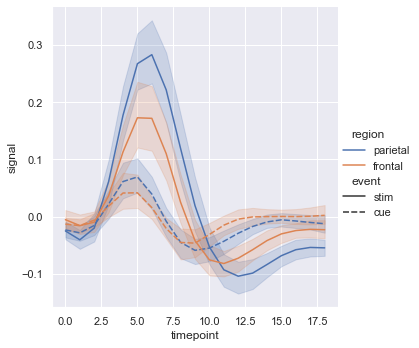

In [24]:
sns.relplot(x='timepoint', y='signal', hue='region', style='event', kind='line', data=fmri);

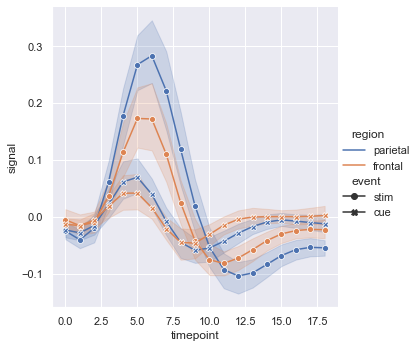

In [25]:
sns.relplot(data=fmri, kind='line', x='timepoint', y='signal', hue='region', style='event',
           dashes=False, markers=True);

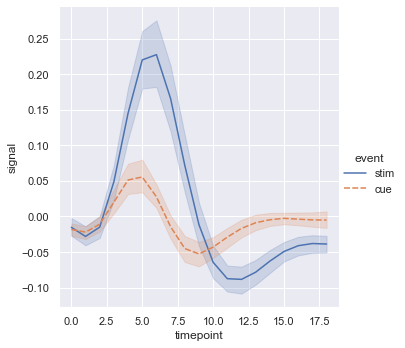

In [26]:
sns.relplot(x='timepoint', y='signal', data=fmri, hue='event', kind='line', style='event');

In [28]:
fmri.query("event =='stim'")

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
527,s8,18,stim,frontal,-0.011114
528,s6,18,stim,frontal,0.046500
529,s5,18,stim,frontal,-0.031013
530,s4,18,stim,frontal,-0.063263


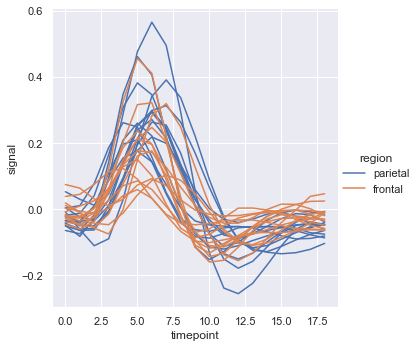

In [27]:
sns.relplot(data=fmri.query("event =='stim'"), kind='line', x='timepoint', y='signal', hue='region', estimator=None,
           units='subject');

In [29]:
dots = sns.load_dataset("dots")
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [30]:
dots = dots.query("align=='dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


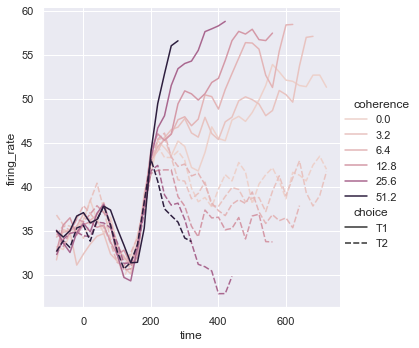

In [31]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

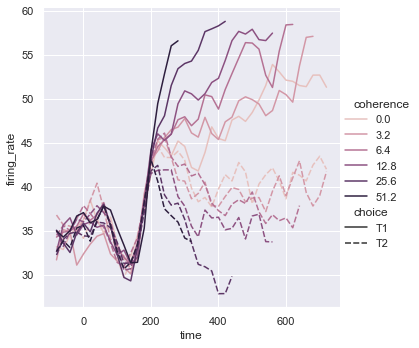

In [32]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

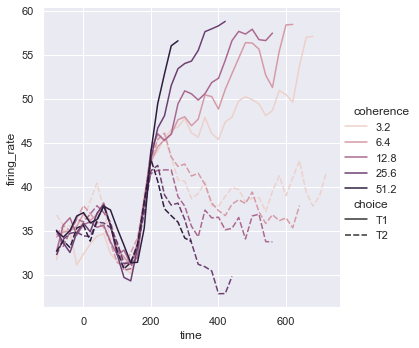

In [33]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x='time', y='firing_rate',
           hue='coherence', style='choice',
           hue_norm=LogNorm(),
           kind='line',
           data=dots.query('coherence > 0'));

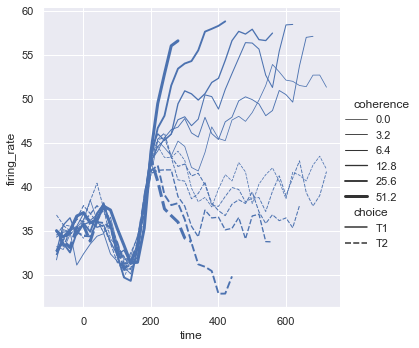

In [34]:
sns.relplot(data=dots, kind='line', x='time', y='firing_rate', 
            size='coherence', style='choice');

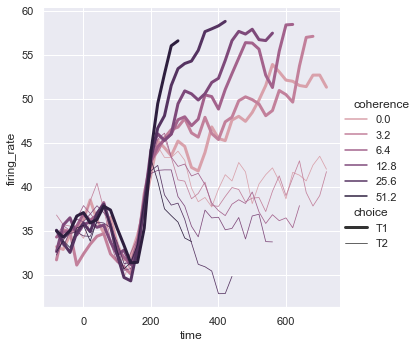

In [35]:
sns.relplot(x='time', y='firing_rate',
           hue='coherence', size='choice',
           palette=palette,
           kind='line', data=dots);

# plotting with date data

In [36]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                      value=np.random.randn(500).cumsum()))
df

,time,value
0,2017-01-01,0.240826
1,2017-01-02,0.483390
2,2017-01-03,-0.074992
3,2017-01-04,-0.318730
4,2017-01-05,0.011574
...,...,...
495,2018-05-11,-14.844007
496,2018-05-12,-13.542922
497,2018-05-13,-14.380999
498,2018-05-14,-13.955808


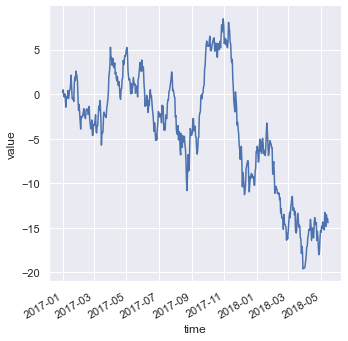

In [37]:
g = sns.relplot(x='time', y='value', kind='line', data=df)
g.figure.autofmt_xdate()

# showing multiple relationships iwth facets

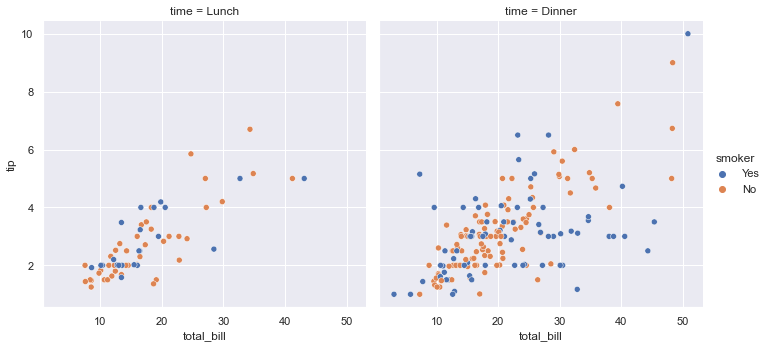

In [38]:
sns.relplot(data=tips, x='total_bill', y='tip', kind='scatter', hue='smoker', col='time');

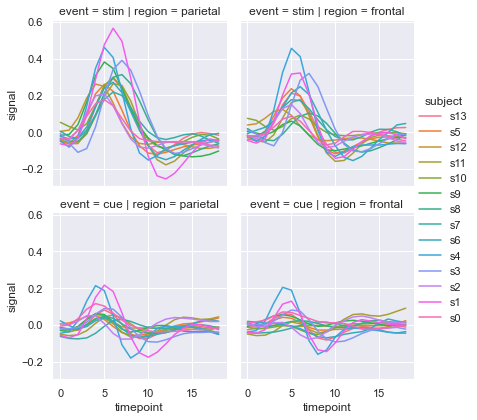

In [39]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

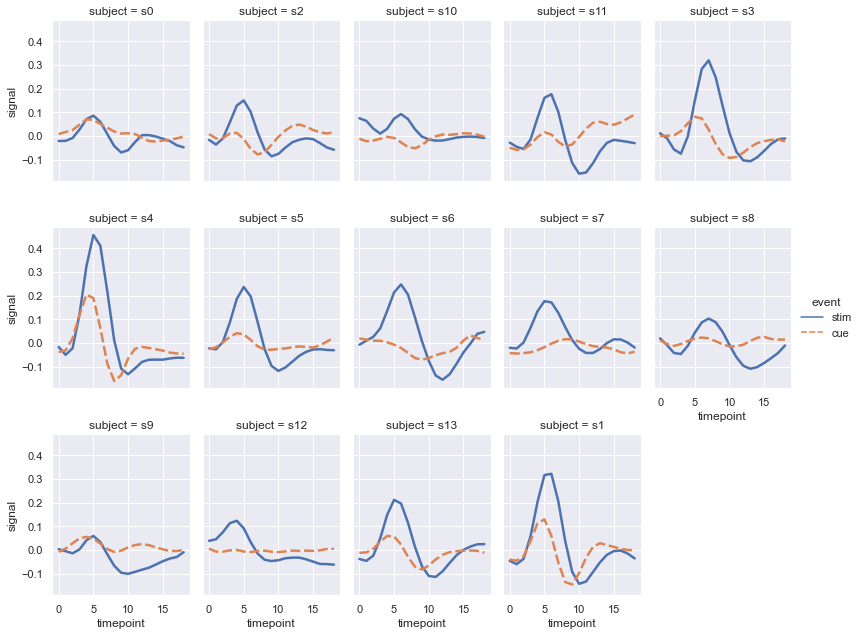

In [43]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event',
           col="subject", col_wrap=5,
           height=3, aspect=.75, linewidth=2.5,
           kind='line', data=fmri.query("region=='frontal'"));